# Capstone Project - The Battle of the Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Data](#data)
* [Analysis](#analysis)
* [Results](#results)
* [Conclusion](#conclusion)

## Data <a name="data"></a>

For the problem in hand of defining which venues are the most convinient to have close to an apartment in terms of its price, we are going to be using the following data sets:

*.csv* file with listed properties scrapped from (www.portalinmobiliario.cl):

* **Tipo de Propiedad (string):** Wether the property is an apartment, storage, house, etc (all are apartments because of the downloaded info.)  
* **Tipo de Publicacion (string):** What kind of listing it is, rent or sale (here all are sale)  
* **Direccion (string):** Address of the listed property  
* **Numero de Piezas (float):** Number of bedrooms in listed property  
* **Numero de Banos(float):** Number of bathrooms in listed property  
* **M2 Utiles (float):** Useful square meters of property  
* **M2 Totales (float):** Total square meters of property  
* **Precio en Pesos (float):** Price in CLP  
* **Precio en UF (float):** Price in UF (unit that takes into account the devaluation of the CLP)  
* **Fecha de Publicacion (string):** Date of listing  
* **Fecha de Extraccion (string):** Date in which the information was extracted from the website  
* **Lat (float):** Latitude coordinate of property  
* **Lng (float):** Longitude coordinate of property  
* **Estacionamiento Incluido (bool):** If the property has parking then True, if not False  
* **Bodega (float):** Number of storage rooms offered with property    
* **Condicion (string):** If the property is new or used  
* **Codigo (int):** Unique code for every listing on website  
* **Url:** URL from where the info was scrapped

Regarding the Foursquare API, requests will be made in order to fill in the type of venues that each of these listed properties have around them. So, using the Foursquare's *search* endpoint with the *intent* parameter set to *browse*, all of the venues in the given radius will be retrieved.

This will return the following response fields:  

* **id:** A unique string identifier for this venue.  
* **name:** The best known name for this venue.  
* **location:** An object containing none, some, or all of address (street address), crossStreet, city, state, postalCode, country, lat, lng, and distance. All fields are strings, except for lat, lng, and distance. Distance is measured in meters. Some venues have their locations intentionally hidden for privacy reasons (such as private residences). If this is the case, the parameter isFuzzed will be set to true, and the lat/lng parameters will have reduced precision.  
* **categories:** An array, possibly empty, of categories that have been applied to this venue. One of the categories will have a primary field indicating that it is the primary category for the venue. For the complete category tree, see categories.  

### Data retrieval

First of all, the data must be downloaded

In [2]:
import pandas as pd

# Read file into pandas dataframe
property_listing_df = pd.read_csv('property_listing.xlsx.csv')
property_listing_df.head()

,Tipo de Publicacion,Tipo de Propiedad,Direccion,Numero de Piezas,Numero de Banos,M2 Utiles,M2 Totales,Precio en Pesos,Precio en UF,Fecha de Publicacion,Fecha de Extraccion,Lat,Lng,Estacionamiento Incluido,Bodega,Condicion,Codigo,Url
0,venta,departamento,"3 Dormitorios, La Castellana ,precioso Las Con...",3.0,2.0,100.0,100.0,264821313.0,9300.0,2020-02-20,2020-03-02,-33.408821,-70.577133,True,1.0,Usado,5441296.0,https://www.portalinmobiliario.com/venta/depar...
1,venta,departamento,"Metro Manquehue, Los Miitares, Rosario Norte, ...",4.0,3.0,125.0,140.0,330314756.0,11600.0,2020-02-10,2020-03-02,-33.409034,-70.568615,True,NaN,Usado,5417148.0,https://www.portalinmobiliario.com/venta/depar...
2,venta,departamento,"Flor De Azucenas, Nueva Las Condes, Las Condes",4.0,4.0,145.0,153.0,347400002.0,12200.0,2020-02-13,2020-03-02,-33.408806,-70.573571,True,NaN,Usado,5325584.0,https://www.portalinmobiliario.com/venta/depar...
3,venta,departamento,"Los Militares / Rosario Norte, Nueva Las Conde...",4.0,3.0,120.0,130.0,301554592.0,10590.0,2019-12-30,2020-03-02,-33.373390,-70.517697,True,NaN,Usado,5273643.0,https://www.portalinmobiliario.com/venta/depar...
4,venta,departamento,"Metro Manquehue - Apoquindo / Flor De Az, Nuev...",3.0,2.0,77.0,99.0,213565575.0,7500.0,2020-02-13,2020-03-02,-33.409034,-70.568615,True,NaN,Usado,5220739.0,https://www.portalinmobiliario.com/venta/depar...


### Data cleaning

We will only be using four of these fields. We will need latitude and longitude to then retrieve venues nearby each of these properties from foursquare. As well as price in CLP and total square meters to get a price per square meter for each property. So next steps are to **eliminate columns not used** and **transform columns** to values that will suit the problem.

In [3]:
# Drop columns that will not be used
# Keep column codigo to make sure no repeated properties in data set
property_listing_df.drop(
    ['Tipo de Publicacion',
     'Tipo de Propiedad',
     'Direccion',
     'Numero de Piezas',
     'Numero de Banos',
     'M2 Totales',
     'Precio en UF',
     'Fecha de Publicacion',
     'Fecha de Extraccion',
     'Estacionamiento Incluido',
     'Bodega',
     'Condicion',
     'Url'
    ], axis=1, inplace=True)

In [4]:
property_listing_df.head()

,M2 Utiles,Precio en Pesos,Lat,Lng,Codigo
0,100.0,264821313.0,-33.408821,-70.577133,5441296.0
1,125.0,330314756.0,-33.409034,-70.568615,5417148.0
2,145.0,347400002.0,-33.408806,-70.573571,5325584.0
3,120.0,301554592.0,-33.373390,-70.517697,5273643.0
4,77.0,213565575.0,-33.409034,-70.568615,5220739.0


In [5]:
print(property_listing_df[property_listing_df.duplicated(['Codigo'])].shape)
print(property_listing_df.shape)

(434, 5)
(7435, 5)


In [6]:
# Delete duplicates (most of them are NaN)
property_listing_df.drop_duplicates(['Codigo'], inplace=True)

In [7]:
# Check if shape corresponds to (7001, 5)
property_listing_df.shape

(7001, 5)

In [8]:
# Drop Nan Values
property_listing_df.dropna(inplace=True)
property_listing_df.shape

(6955, 5)

We can see that only 6 rows had null values

In [9]:
# Drop code column and none values
property_listing_df.drop(['Codigo'], axis=1, inplace=True)
property_listing_df.head()

,M2 Utiles,Precio en Pesos,Lat,Lng
0,100.0,264821313.0,-33.408821,-70.577133
1,125.0,330314756.0,-33.409034,-70.568615
2,145.0,347400002.0,-33.408806,-70.573571
3,120.0,301554592.0,-33.373390,-70.517697
4,77.0,213565575.0,-33.409034,-70.568615


### Check Data Set

Now that we hace already got the information we want without duplicates, we can proceed to check the data to see if it is a good set of data and wether or not it has some outliers or misleading information.

In [10]:
property_listing_df.describe()

,M2 Utiles,Precio en Pesos,Lat,Lng
count,6955.000000,6.955000e+03,6955.000000,6955.000000
mean,142.795905,3.553965e+08,-33.368891,-70.582940
std,158.730331,2.318569e+08,1.367866,1.267918
min,0.000000,1.050000e+04,-41.148853,-73.267975
25%,86.000000,2.137419e+08,-33.417183,-70.586669
50%,128.000000,2.992387e+08,-33.410683,-70.568615
75%,160.000000,3.989849e+08,-33.397185,-70.553902
max,10370.000000,3.422428e+09,45.052621,9.692984


With just this line of code, we can observe that some values for useful square meters are way too high (10km) and some way too low (0m). In the price column, we can observe that there is a huge std, which is not a very good sign. Latitude and longitude values also are wrong for some values, as latitude 45 or longitude 9.6 are clearly not in Chile even. So we will have to clean this data.

In [11]:
# First, change names of column to make them easier
property_listing_df.rename(columns={'M2 Utiles': 'sqm', 'Precio en Pesos': 'price', 'Lat': 'lat', 'Lng': 'lng'}, inplace=True)

In [12]:
# Keep only apartments with more than 20 square meters (reasonable)
property_listing_df = property_listing_df[property_listing_df['sqm'] > 20]

# Keep only apartments with maximum 1500 sqm (reasonable)
property_listing_df = property_listing_df[property_listing_df['sqm'] <= 1500]

# Keep only price values lower than 1,000,000,000 (reasonable)
property_listing_df = property_listing_df[property_listing_df['price'] <= 1000000000]

# Keep only price values higher than 20,000,000 (reasonable)
property_listing_df = property_listing_df[property_listing_df['price'] >= 20000000]

# Keep only lat values between -33.5 and -33.3 (Values for Las Condes, Santiago, Chile)
property_listing_df = property_listing_df[(property_listing_df['lat'] >= -33.5) & (property_listing_df['lat'] <= -33.3)]

# Keep only lng values between -70.7 and -70.4 (Values for Las Condes, Santiago, Chile)
property_listing_df = property_listing_df[(property_listing_df['lng'] >= -70.7) & (property_listing_df['lng'] <= -70.4)]

In [13]:
property_listing_df.describe()

,sqm,price,lat,lng
count,6469.000000,6.469000e+03,6469.000000,6469.000000
mean,133.561210,3.334613e+08,-33.407805,-70.564100
std,72.069537,1.691197e+08,0.014709,0.027521
min,25.000000,2.137419e+07,-33.489700,-70.677969
25%,83.000000,2.137419e+08,-33.417400,-70.584541
50%,124.000000,2.992387e+08,-33.411545,-70.568615
75%,151.000000,3.933662e+08,-33.400330,-70.554484
max,680.000000,9.983368e+08,-33.318218,-70.493782


### Comments on data

So we have cleaned our data set from outliers and now we have realistic values. To summarize changes we have the differences seen in the describe() functions:

* **sqm:** std from 159 to 72  
* **price:** std from 2.3e+08 to 1.7e+08  
* **lat:** std from 1.37 to 0.015
* **lng:** std from 1.27 to 0.028

So with this we can see that now our dataset seems to be of real data and not typing errors or other types of misleading information. In total we deleted **414** rows of misleading data.

Now we can convert price and sql to price/sqm column

In [14]:
# Add price/sqm column
property_listing_df['sqm price'] = property_listing_df['price'] / property_listing_df['sqm']
property_listing_df.head()

,sqm,price,lat,lng,sqm price
0,100.0,264821313.0,-33.408821,-70.577133,2.648213e+06
1,125.0,330314756.0,-33.409034,-70.568615,2.642518e+06
2,145.0,347400002.0,-33.408806,-70.573571,2.395862e+06
3,120.0,301554592.0,-33.373390,-70.517697,2.512955e+06
4,77.0,213565575.0,-33.409034,-70.568615,2.773579e+06


In [15]:
property_listing_df.drop(['sqm', 'price'], axis=1, inplace=True)
property_listing_df.head()

,lat,lng,sqm price
0,-33.408821,-70.577133,2.648213e+06
1,-33.409034,-70.568615,2.642518e+06
2,-33.408806,-70.573571,2.395862e+06
3,-33.373390,-70.517697,2.512955e+06
4,-33.409034,-70.568615,2.773579e+06


In [16]:
# Finally check new statistics
property_listing_df.describe()

,lat,lng,sqm price
count,6469.000000,6469.000000,6.469000e+03
mean,-33.407805,-70.564100,2.614768e+06
std,0.014709,0.027521,6.185690e+05
min,-33.489700,-70.677969,2.913969e+05
25%,-33.417400,-70.584541,2.203742e+06
50%,-33.411545,-70.568615,2.521058e+06
75%,-33.400330,-70.554484,2.894964e+06
max,-33.318218,-70.493782,7.124730e+06


### Add Foursquare Venues Information to DF

Now we can request the foursquare API to get all the information we need on what venues are near each of the different properties.

In [17]:
# Foursquare credentials

CLIENT_ID = 'JBNZOIVSC431WAJGTONJYKIO3WJPWM330ZVTM4W2U5GY5BMQ'
CLIENT_SECRET = 'KYRL22H4SXRTHFWQ3PBX2NTYUXAHL4MS0YDS2RNZLOUSTISO'
LIMIT = 100
radius = 500
LIMIT = 100
intent = 'browse'
VERSION = '20200401'
search_url = 'https://api.foursquare.com/v2/venues/search?'


In [18]:
import requests

latitude = -33.40882
longitude = -70.577133

url = '{}client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}&intent={}'.format(
    search_url,
    CLIENT_ID,
    CLIENT_SECRET,
    latitude,
    longitude,
    VERSION,
    radius,
    LIMIT,
    intent)
response = requests.get(url)

In [19]:
venues = response.json()['response']['venues']
print(len(venues))

86


In [20]:
radius = 100

url = '{}client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}&intent={}'.format(
    search_url,
    CLIENT_ID,
    CLIENT_SECRET,
    latitude,
    longitude,
    VERSION,
    radius,
    LIMIT,
    intent)
response = requests.get(url)
venues = response.json()['response']['venues']
print(len(venues))

86


### Decisions

We see that for different values of radius in a very populated place (selected on purpose) we get the same maximum number of venues. This is why we are going to use the number of appearences divided by the distance to each of these appearences as the value of each categories box. This way we don't discriminate places with lots of venues close just because other venues appear in the response.

For better understanding, take this following example into account. If location A has a school 500m from it, this will probably be good. Location B in the other hand has a school 250m away, which we could say is better. Now, if location B has too many venues nearby, maybe the school does not appear in the response. So to make this more even, we divide by the distance to the venue. Now the school for location A gives the least possible sum for the column schools (as 500m is the maximum radius we are using)

### Data Wrangling

Now we proceed to get the sum of venues nearby in each category divided by their distance to the evaluated property.

We will create a DataFrame that has the columns lat, lng and one column for each category with its value for each row represented by the count of that type of venue divided in the distance from the property to these venues.

In [313]:
# Add function to get venues from lat and lng
def get_venues(lat, lng, radius):
    url = '{}client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}&intent={}'.format(
        search_url,
        CLIENT_ID,
        CLIENT_SECRET,
        latitude,
        longitude,
        VERSION,
        radius,
        LIMIT,
        intent)

    venues = requests.get(url).json()['response']['venues']
    return venues

In [335]:
# Function to create a dict with the values for each category divided by distance to venues
def create_property_categories_dict(venues):
    property_categories = {}
    for venue in venues:
        dist = float(venue['location']['distance'])
        for category in venue['categories']:
            if category['primary'] == True and dist >= 1:
                if category['name'] in property_categories.keys():
                    property_categories[category['name']] += 1/dist
                else:
                    property_categories[category['name']] = 1/dist
    
    return property_categories

In [323]:
# Function to add row to final dict dataframe
def add_row(dict_df, processed_properties, property_categories, lat, lng):
    dict_df['lat'].append(lat)
    dict_df['lng'].append(lng)
    for category in property_categories.keys():
        if category in dict_df.keys():
            # Add value for this category if present
            dict_df[category].append(property_categories[category])
        else:
            # Create list for this category
            dict_df[category] = [0] * processed_properties + [property_categories[category]]
            
    # For each category not in this property but in others, add a 0
    for category in list(set(dict_df.keys()).difference(property_categories.keys())):
        if category not in ('lat, lng'):
            dict_df[category].append(0)
            
    processed_properties += 1
    return dict_df, processed_properties

In [337]:
radius = 500
processed_properties = 0
dict_df = {'lat': [], 'lng': []}

for index, row in property_listing_df.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    venues = get_venues(latitude, longitude, radius)
    property_categories = create_property_categories_dict(venues)
    dict_df, processed_properties = add_row(dict_df, processed_properties, property_categories, latitude, longitude)
    if index % 500 ==  0:
        print('We are in property {} already! Hang on..'.format(index))

print('Dictionary ready to convert in data frame and then merge!!')

We are in property 0 already! Hang on..
We are in property 500 already! Hang on..
We are in property 1000 already! Hang on..
We are in property 1500 already! Hang on..
We are in property 2000 already! Hang on..
We are in property 2500 already! Hang on..
We are in property 3000 already! Hang on..
We are in property 4000 already! Hang on..
We are in property 5000 already! Hang on..
We are in property 5500 already! Hang on..
We are in property 6500 already! Hang on..
We are in property 7000 already! Hang on..
Dictionary ready to convert in data frame and then merge!!


In [338]:
foursquare_df = pd.DataFrame.from_dict(dict_df)
foursquare_df.head()

,lat,lng,Park,Residential Building (Apartment / Condo),Boutique,Dog Run,Breakfast Spot,Office,Bakery,Dentist's Office,...,New American Restaurant,Apres Ski Bar,Adult Education Center,Night Market,Pop-Up Shop,Cooking School,Sporting Event,Hospital Ward,Outdoor Sculpture,Souvenir Shop
0,-33.408821,-70.577133,0.036836,0.231205,0.013514,0.086199,0.003030,0.152661,0.002994,0.039121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-33.409034,-70.568615,0.000000,0.009174,0.062500,0.000000,0.040000,0.071016,0.048200,0.077922,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-33.408806,-70.573571,0.000000,0.210924,0.000000,0.000000,0.000000,0.265683,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-33.373390,-70.517697,0.000000,0.000000,0.000000,0.000000,0.007874,0.058639,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-33.409034,-70.568615,0.000000,0.009174,0.062500,0.000000,0.040000,0.071016,0.048200,0.077922,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [401]:
# Save dataframe to csv to avoid waiting again
foursquare_df.to_csv('foursquare_df.csv', index = False)

In [21]:
import pandas as pd

In [22]:
foursquare_df = pd.read_csv('foursquare_df.csv')

### Cleaning Foursquare Data

Now that we have and indicator of proximity and appearences of every category of venues to each property, we now have to choose which categories are the ones that are really the important ones. So, we are going to do some things that will be explained on the way.

First, we will join all categories that are of the same king, for example restaurants

In [23]:
restaurant_categories = []
bar_categories = []
store_categories = []
office_categories = []
coffee_categories = []
gym_categories = []
school_categories = []
basics_categories = []
night_categories = []
park_categories = []
bus_categories = []
pharmacy_categories = []
medicine_categories = []
religion_categories = []
entertainment_categories = []
care_categories = []
outdoor_categories = []
books_categories = []

for column in foursquare_df.columns:
    if 'Spa' == column or 'Salon' in column or 'Beauty' in column:
        care_categories.append(column)
    elif 'Store' in column and 'Grocery' not in column:
        store_categories.append(column)
    elif ('Restaurant' in column or 'Food' in column or 'Creperie' in column or 'Pizza' in column or 'Steakhouse' in column or ' Place' in column or 'Joint' in column or 'Buffet' in column or 'Bistro' == column or 'Diner' in column) and 'Places' not in column:
        restaurant_categories.append(column)
    elif ('Bar' in column or 'Pub' in column or 'Gastropub' in column or 'Beer Garden' in column) and 'Art' not in column:
        bar_categories.append(column)
    elif 'Office' in column:
        office_categories.append(column)
    elif 'Coffee' in column or 'Caf' in column:
        coffee_categories.append(column)
    elif 'Gym' in column or 'Sports' in column or 'Yoga' in column or 'Dance' in column or 'Dojo' in column or 'Pilates' in column or 'Rock Climbing' in column or 'Skating' in column or 'Bike Trail' in column or 'Tennis Court' in column:
        gym_categories.append(column)
    elif 'Shop' in column or 'Market' in column:
        store_categories.append(column)
    elif 'School' in column or 'College' in column or 'Education' in column or 'University' in column:
        school_categories.append(column)
    elif 'Grocery' in column or 'Bakery' in column or 'Butcher' in column:
        basics_categories.append(column)
    elif 'Night' in column or 'Strip' in column or 'Motel' in column:
        night_categories.append(column)
    elif 'Park' in column and 'ing' not in column or 'Plaza' in column or 'Garden' == column:
        park_categories.append(column)
    elif 'Bus ' in column:
        bus_categories.append(column)
    elif 'Drugstore' in column or 'Pharmacy' in column:
        pharmacy_categories.append(column)
    elif 'Medical Center' in column or 'Hospital' in column or 'Emergency' in column or 'Medical Lab' in column:
        medicine_categories.append(column)
    elif 'Temple' in column or 'Synagogue' in column or 'Church' in column or 'Mosque' in column:
        religion_categories.append(column)
    elif 'Entertainment' in column or 'Club' in column or 'Theater' in column or 'Museum' in column or 'Circus' in column or 'Pool' in column or 'Play' in column or 'Cultural' in column or 'Art' in column or 'Aquarium' in column or 'Paintball' in column or 'Bowling' in column:
        entertainment_categories.append(column)
    elif 'Outdoors' in column:
        outdoor_categories.append(column)
    elif 'Library' in column or 'Bookstore' in column:
        books_categories.append(column)

print('Restaurant categories: ', len(restaurant_categories))
print('Bar categories: ', len(bar_categories))
print('Store categories: ', len(store_categories))
print('Office categories: ', len(office_categories))
print('Coffee categories: ', len(coffee_categories))
print('Gym categories: ', len(gym_categories))
print('School categories: ', len(school_categories))
print('Basic categories: ', len(basics_categories))
print('Night categories: ', len(night_categories))
print('Park categories: ', len(park_categories))
print('Bus categories: ', len(bus_categories))
print('Pharmacy categories: ', len(pharmacy_categories))
print('Medicine categories: ', len(medicine_categories))
print('Religion categories: ', len(religion_categories))
print('Entertainment categories: ', len(entertainment_categories))
print('Care categories: ', len(care_categories))
print('Outdoors categories: ', len(outdoor_categories))
print('Books categories: ', len(books_categories))

Restaurant categories:  82
Bar categories:  18
Store categories:  98
Office categories:  8
Coffee categories:  9
Gym categories:  19
School categories:  42
Basic categories:  4
Night categories:  5
Park categories:  10
Bus categories:  3
Pharmacy categories:  2
Medicine categories:  5
Religion categories:  5
Entertainment categories:  31
Care categories:  5
Outdoors categories:  2
Books categories:  2


We notice that many categories fall in the same big category.

Now we will group these columns into one and then check how much properties fall in each of the categories

In [24]:
# Join restaurant columns and drop
foursquare_df['Restaurant Category'] = foursquare_df[restaurant_categories].sum(axis=1)
foursquare_df.drop(restaurant_categories, axis=1, inplace=True)
print(foursquare_df.shape)

(6469, 490)


In [25]:
# Join bar columns and drop
foursquare_df['Bar Category'] = foursquare_df[bar_categories].sum(axis=1)
foursquare_df.drop(bar_categories, axis=1, inplace=True)
print(foursquare_df.shape)

(6469, 473)


In [26]:
# Join store columns and drop
foursquare_df['Store Category'] = foursquare_df[store_categories].sum(axis=1)
foursquare_df.drop(store_categories, axis=1, inplace=True)
print(foursquare_df.shape)

(6469, 376)


In [27]:
# Join office columns and drop
foursquare_df['Office Category'] = foursquare_df[office_categories].sum(axis=1)
foursquare_df.drop(office_categories, axis=1, inplace=True)
print(foursquare_df.shape)

(6469, 369)


In [28]:
# Join Coffee columns and drop
foursquare_df['Coffee Category'] = foursquare_df[coffee_categories].sum(axis=1)
foursquare_df.drop(coffee_categories, axis=1, inplace=True)
print(foursquare_df.shape)

(6469, 361)


In [29]:
# Join gym columns and drop
foursquare_df['Sports Category'] = foursquare_df[gym_categories].sum(axis=1)
foursquare_df.drop(gym_categories, axis=1, inplace=True)
print(foursquare_df.shape)

(6469, 343)


In [30]:
# Join school columns and drop
foursquare_df['School Category'] = foursquare_df[school_categories].sum(axis=1)
foursquare_df.drop(school_categories, axis=1, inplace=True)
print(foursquare_df.shape)

(6469, 302)


In [31]:
# Join basic columns and drop
foursquare_df['Basic Needs Category'] = foursquare_df[basics_categories].sum(axis=1)
foursquare_df.drop(basics_categories, axis=1, inplace=True)
print(foursquare_df.shape)

(6469, 299)


In [32]:
# Join night columns and drop
foursquare_df['Nightlife Category'] = foursquare_df[night_categories].sum(axis=1)
foursquare_df.drop(night_categories, axis=1, inplace=True)
print(foursquare_df.shape)

(6469, 295)


In [33]:
# Join park columns and drop
foursquare_df['Park Category'] = foursquare_df[park_categories].sum(axis=1)
foursquare_df.drop(park_categories, axis=1, inplace=True)
print(foursquare_df.shape)

(6469, 286)


In [34]:
# Join bus columns and drop
foursquare_df['Bus Category'] = foursquare_df[bus_categories].sum(axis=1)
foursquare_df.drop(bus_categories, axis=1, inplace=True)
print(foursquare_df.shape)

(6469, 284)


In [35]:
# Join pharmacy columns and drop
foursquare_df['Pharmacy Category'] = foursquare_df[pharmacy_categories].sum(axis=1)
foursquare_df.drop(pharmacy_categories, axis=1, inplace=True)
print(foursquare_df.shape)

(6469, 283)


In [36]:
# Join medicine columns and drop
foursquare_df['Medicine Category'] = foursquare_df[medicine_categories].sum(axis=1)
foursquare_df.drop(medicine_categories, axis=1, inplace=True)
print(foursquare_df.shape)

(6469, 279)


In [37]:
# Join religion columns and drop
foursquare_df['Religion Category'] = foursquare_df[religion_categories].sum(axis=1)
foursquare_df.drop(religion_categories, axis=1, inplace=True)
print(foursquare_df.shape)

(6469, 275)


In [38]:
# Join entertainment columns and drop
foursquare_df['Entertainment Category'] = foursquare_df[entertainment_categories].sum(axis=1)
foursquare_df.drop(entertainment_categories, axis=1, inplace=True)
print(foursquare_df.shape)

(6469, 245)


In [39]:
# Join entertainment columns and drop
foursquare_df['Care Category'] = foursquare_df[care_categories].sum(axis=1)
foursquare_df.drop(care_categories, axis=1, inplace=True)
print(foursquare_df.shape)

(6469, 241)


In [40]:
# Join outdoors columns and drop
foursquare_df['Outdoors Category'] = foursquare_df[outdoor_categories].sum(axis=1)
foursquare_df.drop(outdoor_categories, axis=1, inplace=True)
print(foursquare_df.shape)

(6469, 240)


In [41]:
# Join books columns and drop
foursquare_df['Books Category'] = foursquare_df[books_categories].sum(axis=1)
foursquare_df.drop(books_categories, axis=1, inplace=True)
print(foursquare_df.shape)

(6469, 239)


Now we have reduced the number of categories and joined them into bigger categories. We did this with all the relevant categories that foursquare returned.

In [42]:
# Get number of appearences for each category
n_rows_per_category = []
for column in foursquare_df.columns:
    n_rows_per_category.append((column, foursquare_df[foursquare_df[column] > 0].shape[0]))

In [43]:
# Sort by least appearences to most
n_rows_per_category.sort(key=lambda tup: tup[1])

In [44]:
# Drop categories with less than 500 appearances, misleading
foursquare_df.drop([r[0] for r in n_rows_per_category if r[1] < 500 and r[0] not in ['lat', 'lng']], axis=1, inplace = True)

In [45]:
foursquare_df.shape

(6469, 67)

In [46]:
print([r for r in n_rows_per_category if r[1] > 500 and r[0] not in ['lat', 'lng']])

[('Casino', 506), ('Factory', 577), ('Business Service', 580), ('Bridge', 587), ('Spiritual Center', 600), ('Business Center', 631), ('Music Venue', 638), ('Military Base', 670), ('Soccer Field', 681), ('Supermarket', 696), ('Metro Station', 722), ('Veterinarian', 726), ('Taxi', 734), ('Lounge', 769), ('Historic Site', 795), ('Moving Target', 812), ('Dog Run', 843), ('Auditorium', 855), ('Auto Dealership', 900), ('Convention Center', 947), ('Embassy / Consulate', 956), ('Non-Profit', 963), ('Government Building', 1012), ('Meeting Room', 1085), ('Assisted Living', 1088), ('Conference Room', 1160), ('Hotel', 1291), ('Event Space', 1308), ('Deli / Bodega', 1346), ('Books Category', 1349), ('Student Center', 1394), ('Parking', 1429), ('General Travel', 1440), ('Breakfast Spot', 1478), ('Laundry Service', 1569), ('Speakeasy', 1603), ('Gas Station', 1745), ('Boutique', 1774), ('Advertising Agency', 1806), ('Religion Category', 1891), ('Design Studio', 1899), ('Housing Development', 2002), ('

In [47]:
# Drop unknown or uninformative columns
foursquare_df.drop(['Spiritual Center',
                    'Business Center',
                    'Gas Station',
                    'Assisted Living',
                    'Veterinarian',
                    'Business Service',
                    'Bridge',
                    'Music Venue',
                    'Military Base',
                    'Taxi',
                    'Lounge',
                    'Moving Target',
                    'Dog Run',
                    'Convention Center',
                    'Embassy / Consulate',
                    'Government Building',
                    'Meeting Room',
                    'Conference Room',
                    'Event Space',
                    'Deli / Bodega',
                    'Historic Site',
                    'Auto Dealership',
                    'Student Center',
                    'General Travel',
                    'Breakfast Spot',
                    'Laundry Service',
                    'Speakeasy',
                    'Advertising Agency',
                    'Design Studio',
                    'Housing Development',
                    'Professional & Other Places',
                    'Tech Startup',
                    'Road',
                    'Building',
                    'Residential Building (Apartment / Condo)',
                    'Non-Profit',
                    'Casino',
                    'Factory',
                    'Soccer Field',
                    'Auditorium'], axis=1, inplace=True)

### Data cleaned and ready to merge

We have reduced the number of columns to 210, now we still have to select the best rows for the regression, so we will go on and join this table with the one of the properties and then try and calculate the correlation between these variables and the price to see which variables can help better predict the price of a property.

### Relevant columns selection

Now that we have all our categories grouped in bigger categories we can make a statistical analisis to determine which of these categories are the ones that must be considered for our regression. For this we will start our analisis with a simple correlation of each column with the price column

In [48]:
# Merge prices dataframe with foursquare_df
merged_df = pd.merge(property_listing_df.round(3), foursquare_df.round(3).groupby(['lat', 'lng']).first(), how='left', on=['lat', 'lng'])
merged_df.shape

(6469, 28)

We can see that the shape is as we expected it to be...

In [49]:
# Check for no null values
null_columns=merged_df.columns[merged_df.isnull().any()]
merged_df[null_columns].isnull().sum()

Series([], dtype: float64)

In [50]:
price_corr = abs(merged_df.corr(method='pearson')['sqm price'])

We will be using all columns with absolute values above 0.01 of correlation to start. After this we will fit the data to a regression and see if the categories choosed are significant in our model.

In [51]:
columns_to_keep = [cat[0] for cat in price_corr.iteritems() if cat[1] >= 0.01 and cat[0] not in ['lat', 'lng', 'sqm price']]

In [52]:
# See how many columns left
print(len(columns_to_keep))

17


### Eliminate non significant categories with P-Values

In [53]:
import statsmodels.api as sm

X = merged_df[columns_to_keep]
y = merged_df['sqm price']
m = sm.OLS(y, X).fit()
results_as_html = m.summary().tables[1].as_html()
summary_df = pd.read_html(results_as_html, header=0, index_col=0)[0]
summary_df

,coef,std err,t,P>|t|,[0.025,0.975]
Boutique,8530000.0,1290000.0,6.630,0.000,6010000.0,11100000.0
Metro Station,-4297000.0,1490000.0,-2.880,0.004,-7220000.0,-1370000.0
Supermarket,13110000.0,4640000.0,2.826,0.005,4020000.0,22200000.0
Coworking Space,4389000.0,458000.0,9.573,0.000,3490000.0,5290000.0
Hotel,-2495000.0,352000.0,-7.086,0.000,-3180000.0,-1800000.0
Restaurant Category,3975000.0,230000.0,17.257,0.000,3520000.0,4430000.0
Bar Category,7893000.0,508000.0,15.526,0.000,6900000.0,8890000.0
Store Category,-67540.0,73300.0,-0.922,0.357,-211000.0,76100.0
Office Category,1208000.0,156000.0,7.742,0.000,902000.0,1510000.0
Coffee Category,522500.0,656000.0,0.797,0.426,-763000.0,1810000.0


In [54]:
insignificant_columns = [i for i, p in summary_df['P>|t|'].iteritems() if p >= 0.005]
print(insignificant_columns)

['Supermarket', 'Store Category', 'Coffee Category', 'Books Category']


In [55]:
# Drop insignificant columns from df
significant_df = merged_df[columns_to_keep + ['sqm price']].drop(insignificant_columns, axis=1)

### Testing models

In [56]:
# get data
X = significant_df.drop(['sqm price'], axis = 1)
y = significant_df['sqm price']

# split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X.shape, y.shape)

(6469, 13) (6469,)


In [63]:
# define model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
# test model
from sklearn.metrics import mean_squared_error
print('RMSE: ', mean_squared_error(y_test, lr.predict(X_test), squared = False))
print('R2: ', lr.score(X_test, y_test))

RMSE:  605693.0929438927
R2:  0.007577194751529737


We have our model ready. It has a pretty poor value in predicting, but this is not the main goal of this excercise, as we know. We know that there are many factors not included here that will determine the price of an apartment, or in this case its price per sqm. These factor are number of bedrooms, bathrooms, orient, etc. But here we are using a regression to quantify how much a venue can affect in the price of an apartment, which we will calculate using the coefficients returned by the regression.

In [59]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
# Get value for each category's effect on price
from matplotlib import pyplot as plt
sorted_categories_coefs = list(zip(lr.coef_, X.columns))
sorted_categories_coefs.sort(key=lambda tup: tup[0])
coefs = [i for i, j in sorted_categories_coefs]
categories = [ j for i, j in sorted_categories_coefs ]

([<matplotlib.axis.XTick at 0x10cb80eb8>,
 <a list of 3 Text xticklabel objects>)

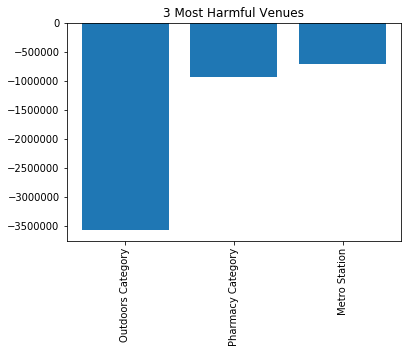

In [64]:
# 3 Most harmful venues to have nearby
plt.bar(categories[0:3], coefs[0:3])
plt.title('3 Most Harmful Venues')
plt.xticks(categories[0:3], categories[0:3], rotation='vertical')

([<matplotlib.axis.XTick at 0x10779b5c0>,
 <a list of 3 Text xticklabel objects>)

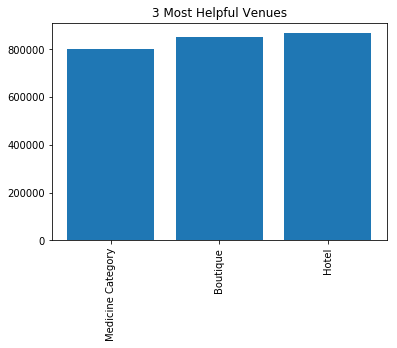

In [65]:
# 3 Best venues to have nearby
plt.bar(categories[-4:-1], coefs[-4:-1])
plt.title('3 Most Helpful Venues')
plt.xticks(categories[-4:-1], categories[-4:-1], rotation='vertical')

## Results

So, we have seen which venues are the ones that most affect the price of a property. We must take into account that this is for a specific area in the city of Santiago de Chile, and it is not a general rule for every place in the world or even in Santiago.

In [62]:
# Explain grouped categories
print('Medicine Category: ', medicine_categories)
print('Outdoors Category: ', outdoor_categories)
print('Pharmacy Category: ', pharmacy_categories)

Medicine Category:  ['Medical Center', 'Hospital', 'Medical Lab', 'Emergency Room', 'Hospital Ward']
Outdoors Category:  ['Outdoors & Recreation', 'Other Great Outdoors']
Pharmacy Category:  ['Pharmacy', 'Drugstore']


### Results explained

We have gotten to the final results that the venues that are most relevant on the price of an apartment are Outdoors, Pharmacy, Metro Station, Medicine, Boutique and Hotel. Where we have positive and negative influences...

Positive:

* Medicine Category: 803.000 coef
* Boutique: 854.000 coef
* Hotel: 867.500 coef

Negative:

* Outdoors Category: -3.572.500 coef
* Pharmacy Category: -935.600 coef
* Metro Station: -707.200 coef

Now, what do these coefficients mean? Well, this is the amount that when divided to the distance of a venue from the evaluated property gice the difference in price that this venue on itself adds (or substracts).

So, let's say that a Medical Center will be addded 350 metres away from property A. So the estimated difference in price for A will be of 803.000 / 350, which is 2295. Then, let's say that property A has 100 sqm, this would mean that the value of property A would have been increased in 2295 x 100, which is 2.295.000 (more or less 4000 dollars).

### Making sense out of results

So, as we saw before, we now know the categories that affect the most. Now we must try and validate this information with some logical reasoning.

We will go one by one of each of the six categories mentioned before understanding why the values are correct.

* **Medicine Center**: Well, obviously being close to a medical center is a plus, it is very common for people to feel safer if they know that some kind of help can be found nearby. So, it makes sense that if a medical center is close, the value of an apartment increases.



* **Boutique**: This one is kind of tricky, because the presence of a boutique shop may also be a consequence of high class neighborhood. So, maybe a property does not change its value for the appearance of a boutique shop, but a neighborhood with boutique shops does have higher prices. This all driven by the fact that clients for boutique are high class people almost exclusively.


* **Hotel**: The presence of a Hotel is probably a good reference that the neighborhood has lots of venues nearby. So The meaning for the Hotel to be a positive influence in price may well be because of the fact that the Hotel brings many venues along with it.


* **Outdoors Category**: This one is pretty evident. If there are outdoors venues nearby that most likely means that there are not many other venues close. This is because in order to have an outdoor venue, there must be a big space (most likely), so if this is a place that is more in the outsides of the city, normally the prices for apartments drop.


* **Pharmacy Categories**: This category I don't really know why it could be a negative influence in price, this must be a coincidence that is subject of the reduced area that was taken into account by the data.


* **Metro Station**: Many would say (even I before this project) that having a metro station close by is a good thing for the price of an apartment. Well, this may be true in other places. But in the specific area of Santiago that was evaluated, the most valuable apartments are actually far away from metro stations, as the people that live there don't really use the public transportation system.

## Conclusion

To conclude, I believe that this model could be much more useful if it had used data from all over the world and maybe standarized better the big categories which would be measured. For example by investigating which categories are commonly relevant on apartment pricing, not only for some places, but for any place in the world. This way, we could have a more general model and we would maybe be able to even predict with some accuracy the price of an apartment in a certain neighborhood.

As a general result, I think that the results where good. Given that it was data from a place that I particularly know, I could give a reason to every coefficient calculated by the model. This is very helpful, as now we could probably submerge deeper into something like the just mentioned investigation.